In [1]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [24]:
import pandas as pd
import yfinance as yf
from datetime import datetime

def get_historical_data(tickers):
    """
    This function returns a pd dataframe with all of the adjusted closing information
    """
    data = yf.download(
        tickers=tickers,
        start="2025-01-01",
        end="2025-04-01",
        interval="1d",
        auto_adjust=False,
        prepost=False,
    )
    
    # Keep only Adjusted Close prices and transpose to match the image format
    if len(tickers) == 1:
        data = data[['Adj Close']].rename(columns={'Adj Close': tickers[0]})
    else:
        data = data['Adj Close']
    
    return data

ticks = ["INTC", "QCOM", "MSFT", "SONO", "1347.HK", "0700.HK", "NVDA", "1810.HK", "2454.TW","1211.HK","9888.HK","0992.HK","0981.HK","2382.HK"]
d = get_historical_data(ticks)

# Format the output to match the image
pd.set_option('display.float_format', '{:.6f}'.format)
print(d.shape)
d.head()

[*********************100%***********************]  14 of 14 completed

(63, 14)


Ticker,0700.HK,0981.HK,0992.HK,1211.HK,1347.HK,1810.HK,2382.HK,2454.TW,9888.HK,INTC,MSFT,NVDA,QCOM,SONO
Date,,,,,,,,,,,,,,
2025-01-02,416.000000,29.000000,9.790000,258.200012,20.200001,34.000000,65.849998,1350.000000,80.800003,20.219999,417.742371,138.297272,152.816010,14.740000
2025-01-03,414.200012,29.549999,9.830000,258.000000,19.980000,36.250000,67.449997,1365.000000,81.050003,20.559999,422.502838,144.456711,156.983536,15.080000
2025-01-06,409.399994,29.650000,9.860000,256.600006,20.150000,36.299999,66.650002,1425.000000,80.750000,19.870001,426.993835,149.416245,158.992706,14.990000
2025-01-07,379.600006,31.150000,9.720000,259.200012,20.750000,34.150002,67.250000,1490.000000,80.449997,20.010000,421.524780,140.127106,159.659119,14.890000
2025-01-08,369.200012,30.549999,9.530000,254.399994,20.100000,32.799999,62.150002,1470.000000,79.849998,19.879999,423.710419,140.097122,158.226837,14.750000


In [25]:
corr_matrix = d.corr()
corr_matrix

Ticker,0700.HK,0981.HK,0992.HK,1211.HK,1347.HK,1810.HK,2382.HK,2454.TW,9888.HK,INTC,MSFT,NVDA,QCOM,SONO
Ticker,,,,,,,,,,,,,,
0700.HK,1.000000,0.841843,0.806488,0.927613,0.924137,0.973118,0.842709,0.203820,0.834121,0.654140,-0.837528,-0.665886,-0.387220,-0.840161
0981.HK,0.841843,1.000000,0.834890,0.850461,0.915742,0.878891,0.900170,0.456119,0.691732,0.529752,-0.669584,-0.591305,-0.119171,-0.659895
0992.HK,0.806488,0.834890,1.000000,0.798564,0.796135,0.788606,0.927911,0.507437,0.720368,0.529640,-0.630787,-0.378543,-0.039152,-0.534995
1211.HK,0.927613,0.850461,0.798564,1.000000,0.887968,0.944916,0.817622,0.367267,0.832255,0.755317,-0.787532,-0.578297,-0.274220,-0.851144
1347.HK,0.924137,0.915742,0.796135,0.887968,1.000000,0.946378,0.863901,0.271266,0.692368,0.638399,-0.748680,-0.589415,-0.333707,-0.775398
1810.HK,0.973118,0.878891,0.788606,0.944916,0.946378,1.000000,0.851203,0.262243,0.807434,0.647370,-0.832593,-0.679657,-0.385111,-0.825178
2382.HK,0.842709,0.900170,0.927911,0.817622,0.863901,0.851203,1.000000,0.435618,0.715182,0.590832,-0.604869,-0.403530,-0.066165,-0.564931
2454.TW,0.203820,0.456119,0.507437,0.367267,0.271266,0.262243,0.435618,1.000000,0.290677,0.325692,0.061359,0.065098,0.529253,0.005211
9888.HK,0.834121,0.691732,0.720368,0.832255,0.692368,0.807434,0.715182,0.290677,1.000000,0.576021,-0.679524,-0.588896,-0.085810,-0.763136


<AxesSubplot:xlabel='Ticker', ylabel='Ticker'>

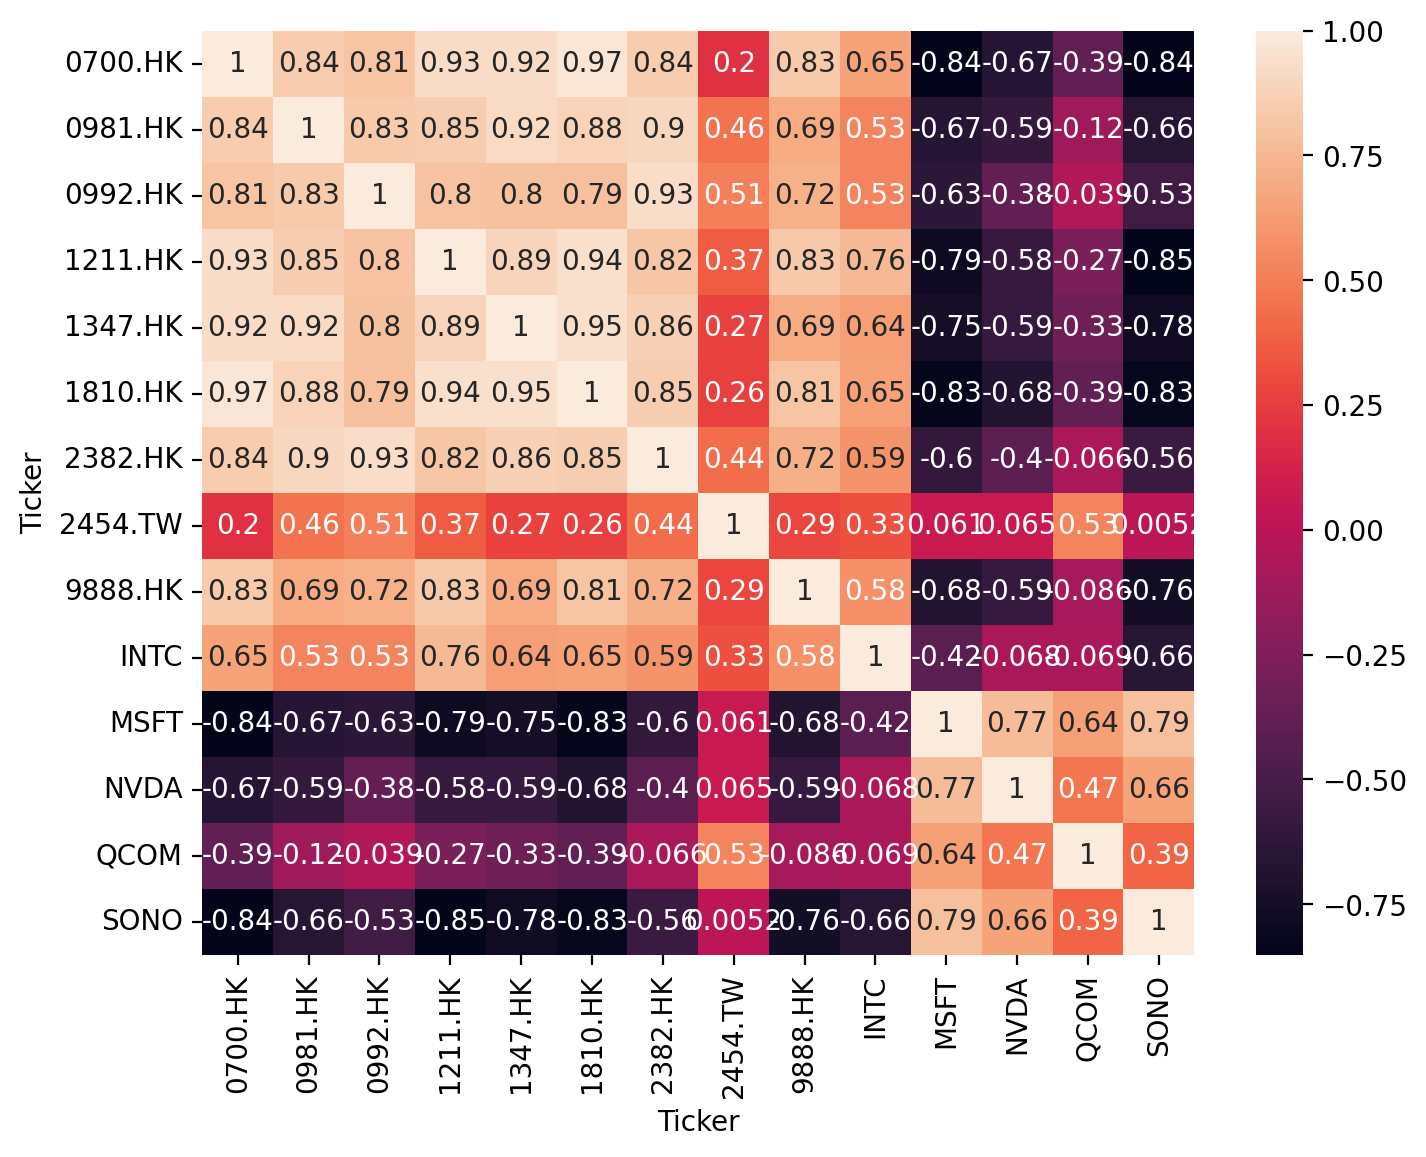

In [26]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(8,6), dpi=200)
sns.heatmap(corr_matrix, annot=True)


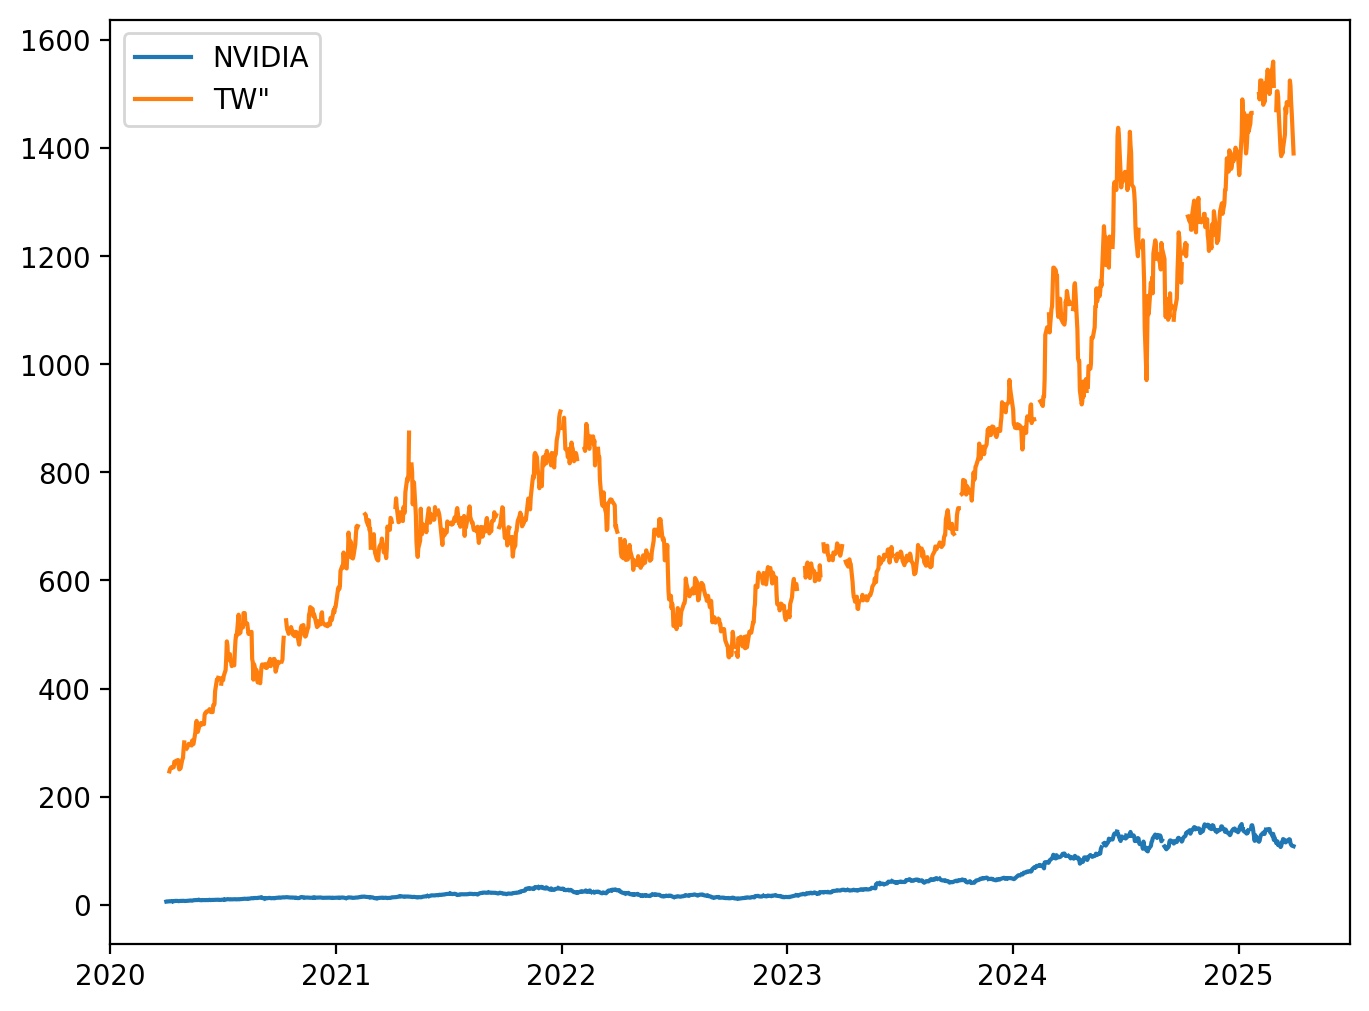

In [8]:
import matplotlib.pyplot as plt
figure(figsize=(8,6), dpi=200)
nvda = d['NVDA']
TW = d['2454.TW']

plt.plot(nvda, label='NVIDIA')
plt.plot(TW, label= 'TW"')
plt.legend()


In [18]:
a = TW.mean
print(a)

<bound method NDFrame._add_numeric_operations.<locals>.mean of Date
2020-04-01    241.823044
2020-04-02           NaN
2020-04-03           NaN
2020-04-06    246.891190
2020-04-07    251.235336
                 ...    
2025-03-25   1525.000000
2025-03-26   1515.000000
2025-03-27   1485.000000
2025-03-28   1465.000000
2025-03-31   1390.000000
Name: 2454.TW, Length: 1298, dtype: float64>


Text(0.5, 1.0, 'Spread between CME and XM')

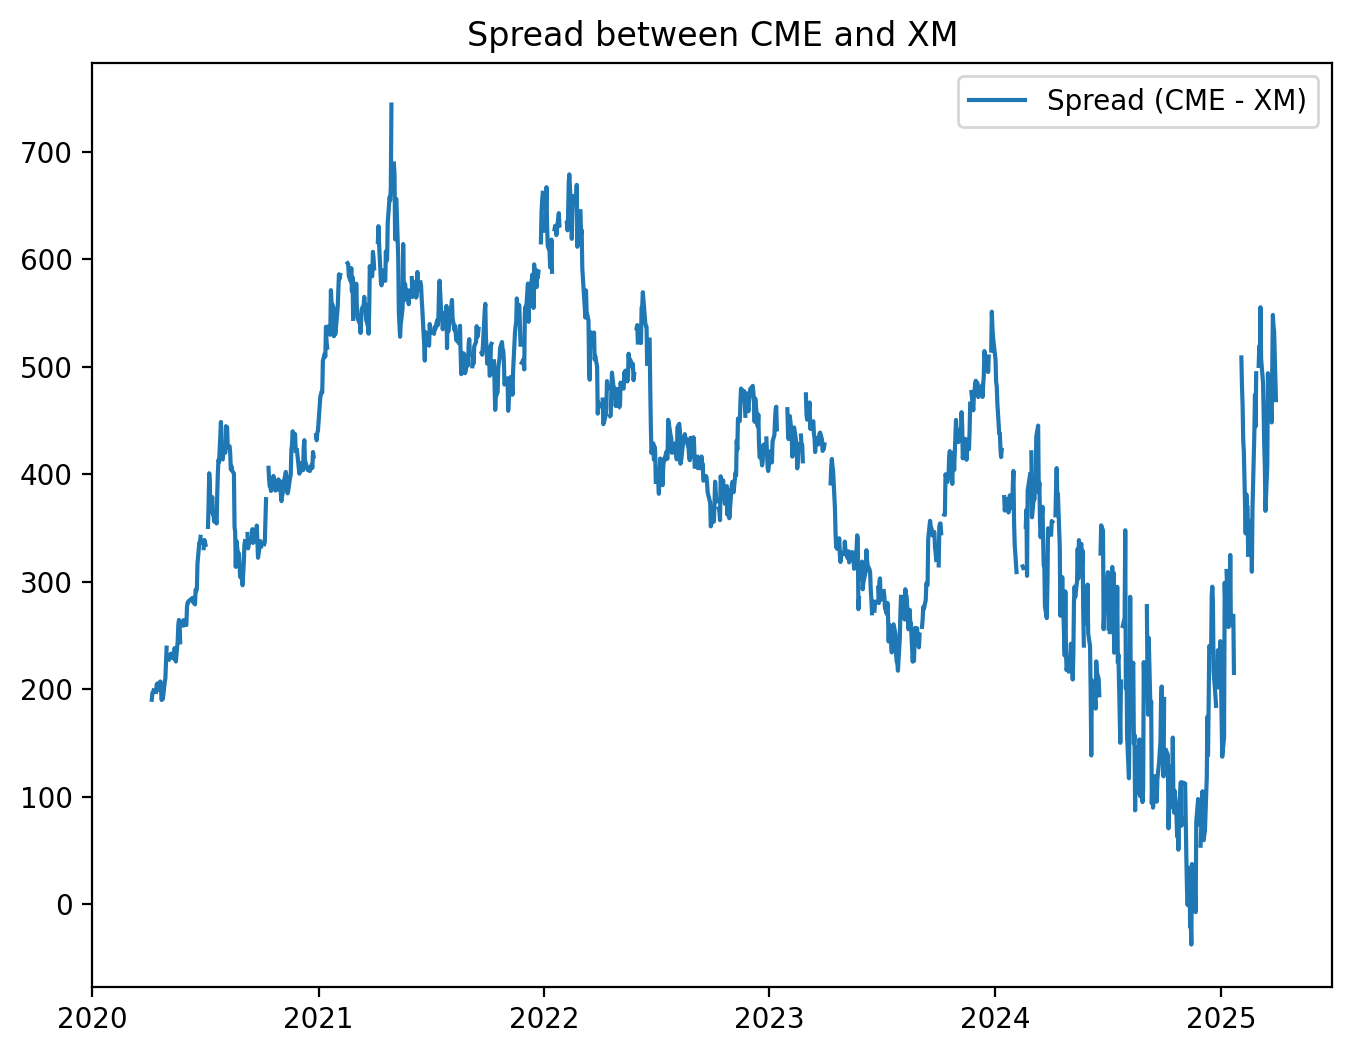

In [15]:
figure(figsize=(8,6), dpi=200)
plt.plot(TW - 8.5*nvda, label='Spread (CME - XM)')
plt.legend()
plt.title('Spread between CME and XM')

In [44]:
import statsmodels.tsa.stattools as ts
result = ts.coint(CME_, XM)


MissingDataError: exog contains inf or nans

In [64]:
cointegration_t_statistic = result[0]
p_value = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print("We want the P val < 0.05 (meaning that we can reject the null hypothesis of no cointegration)")
print('P value for the argumented Engle-Granger test is:', p_value)

We want the P val < 0.05 (meaning that we can reject the null hypothesis of no cointegration)
P value for the argumented Engle-Granger test is: 0.9859002580259643


In [65]:
from statsmodels.tsa.stattools import adfuller
# Perform Augmented Dickey-Fuller test on BRK_B
BRK_B_ADF = adfuller(BRK_B)
print('P value for the Augmented Dickey-Fuller test on BRK_B:', BRK_B_ADF[1])
MSFT_ADF = adfuller(MSFT)
print('P value for the Augmented Dickey-Fuller test on MSFT:', MSFT_ADF[1])
Spread_ADF = adfuller(BRK_B - MSFT)
print('P value for the Augmented Dickey-Fuller test on the spread:', Spread_ADF[1])
Ratio_ADF = adfuller(BRK_B / MSFT)
print('P value for the Augmented Dickey-Fuller test on the ratio:', Ratio_ADF[1])


P value for the Augmented Dickey-Fuller test on BRK_B: 0.58955434924671
P value for the Augmented Dickey-Fuller test on MSFT: 0.44867848974084457
P value for the Augmented Dickey-Fuller test on the spread: 0.998251330281234
P value for the Augmented Dickey-Fuller test on the ratio: 0.9980151337220544


Text(0.5, 1.0, 'Price Ratio between BRK and MSFT')

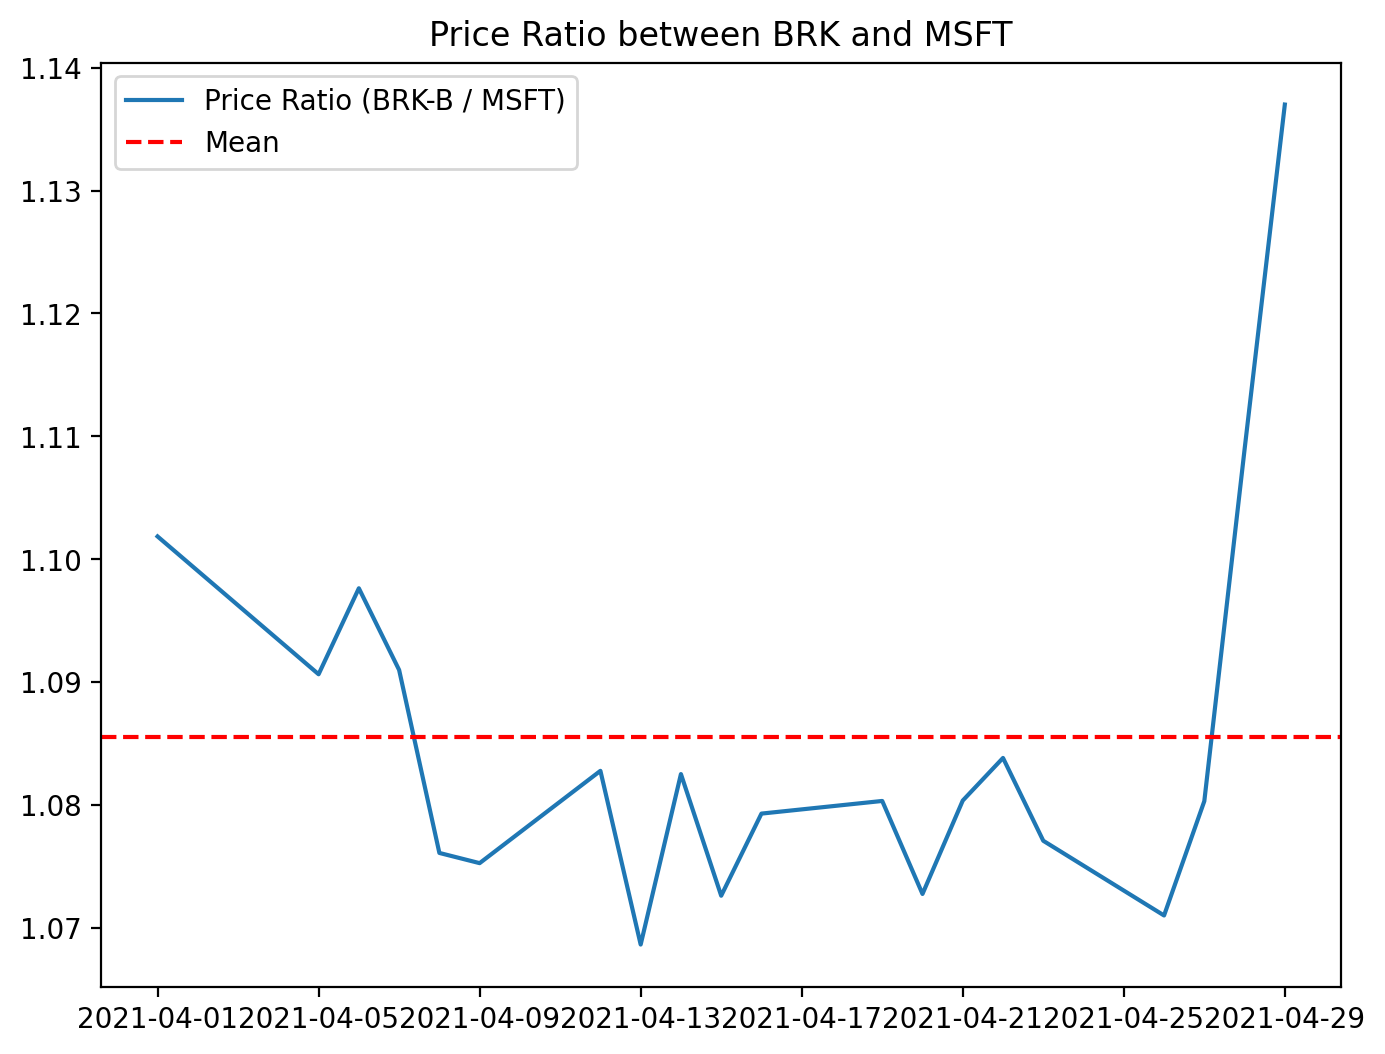

In [ ]:
# Take a look at two time series
figure(figsize=(8,6), dpi=200)
ratio = BRK_B / MSFT
plt.plot(ratio, label='Price Ratio (BRK-B / MSFT)')
plt.axhline(ratio.mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.title('Price Ratio between BRK and MSFT')

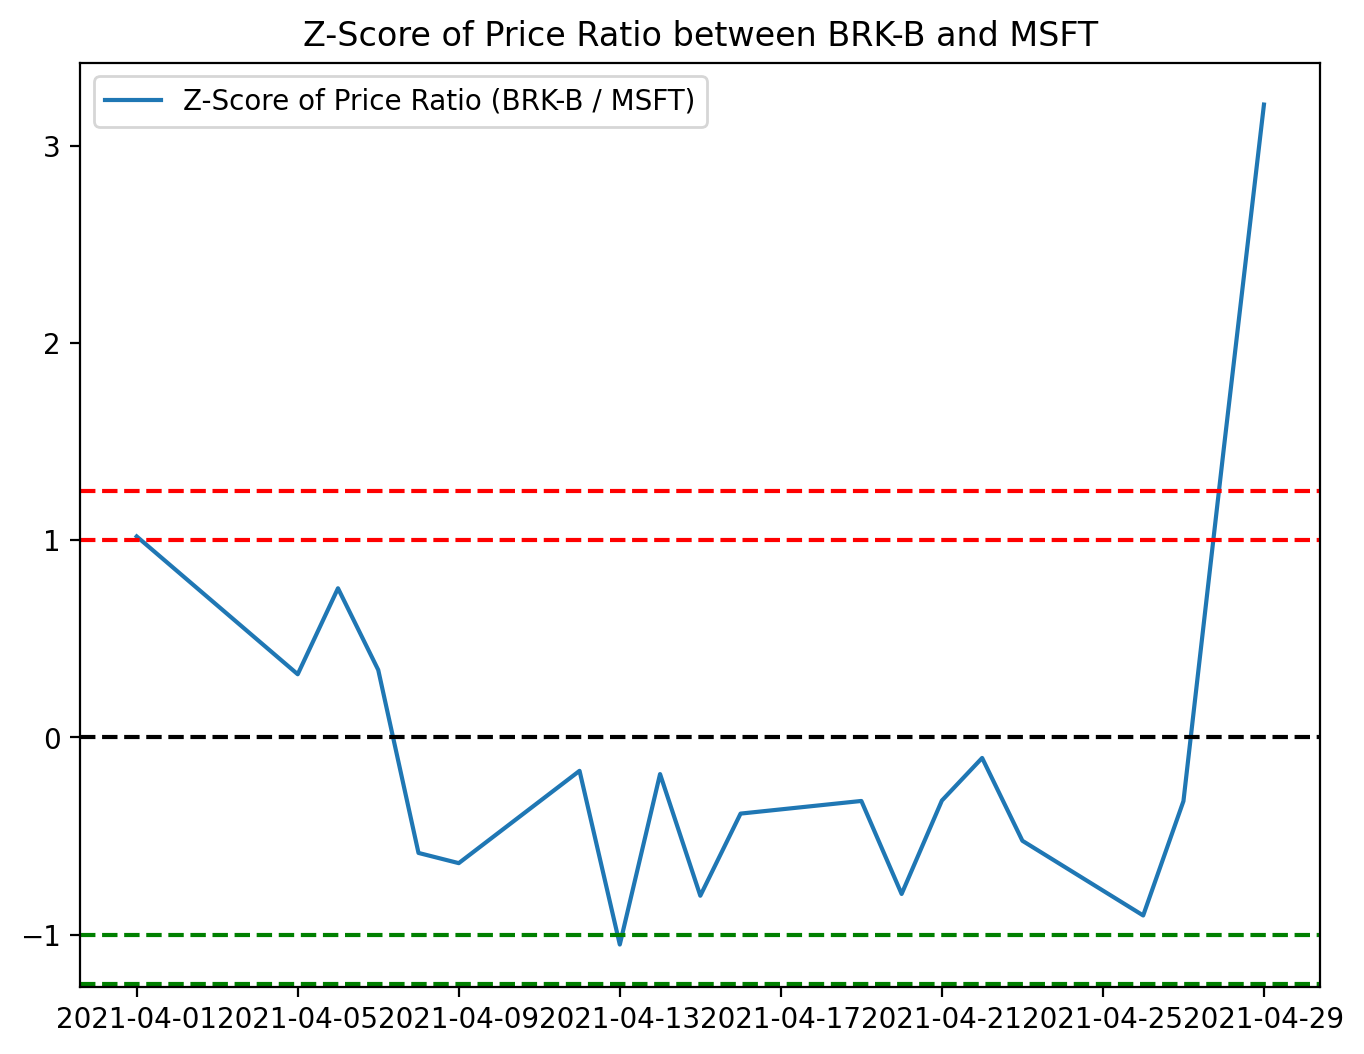

In [72]:
# Note, here you can either use the spread or the price ratio approach. Right now, standardize the ratio
# upper and lower bounds to help evaluate the trend
figure(figsize=(8,6), dpi=200)
# Calculate the z-score of ratio
df_zscore = (ratio - ratio.mean()) / ratio.std()
plt.plot(df_zscore, label='Z-Score of Price Ratio (BRK-B / MSFT)')
plt.axhline(df_zscore.mean(), color='black', linestyle='--')
plt.axhline(1.0, color='red', linestyle='--') # Setting upper bound to the z-sscore of 1.0 (68% confidence interval)
plt.axhline(-1.0, color='green', linestyle='--') 
plt.axhline(1.25, color='red', linestyle='--') # Setting upper bound to the z-sscore of 1.5 (79% confidence interval)
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(loc = 'best')
plt.title('Z-Score of Price Ratio between BRK-B and MSFT')
plt.show()

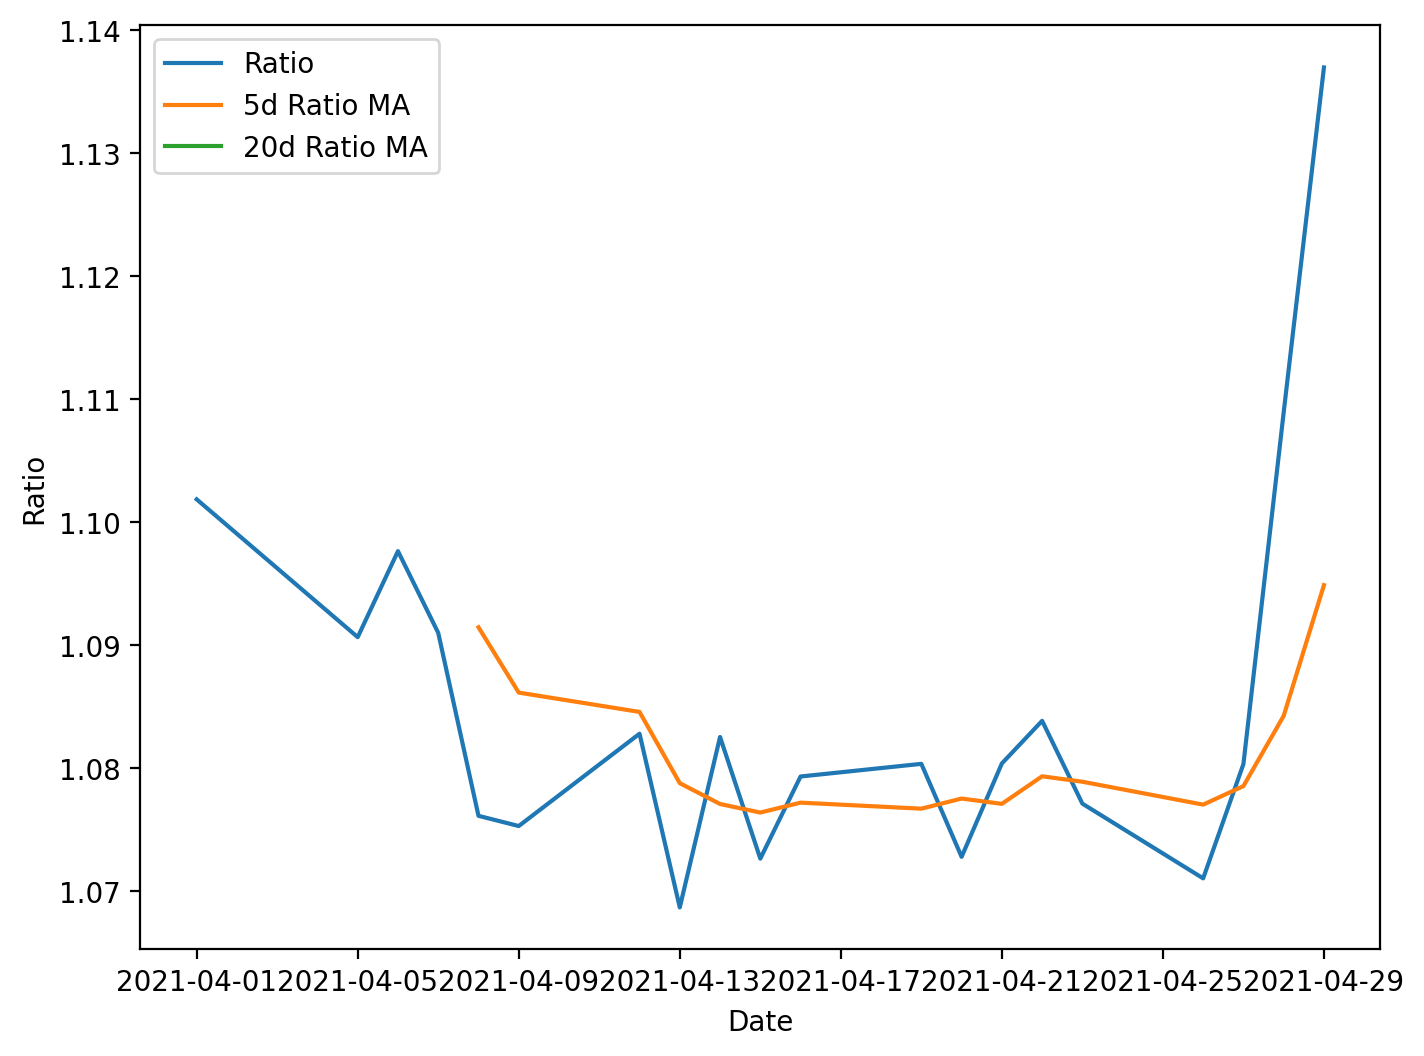

In [77]:
# Split 80/20 for training and testing (but lack of backtest)
# train = ratio[0:round(0.8*len(ratio))]
# test = ratio[round(0.8*len(ratio)):]
 
figure(figsize=(8,6), dpi=200)
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20) / std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values, label='5-day Moving Average')
plt.plot(ratios_mavg20.index, ratios_mavg20.values, label='20-day Moving Average')
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.show()

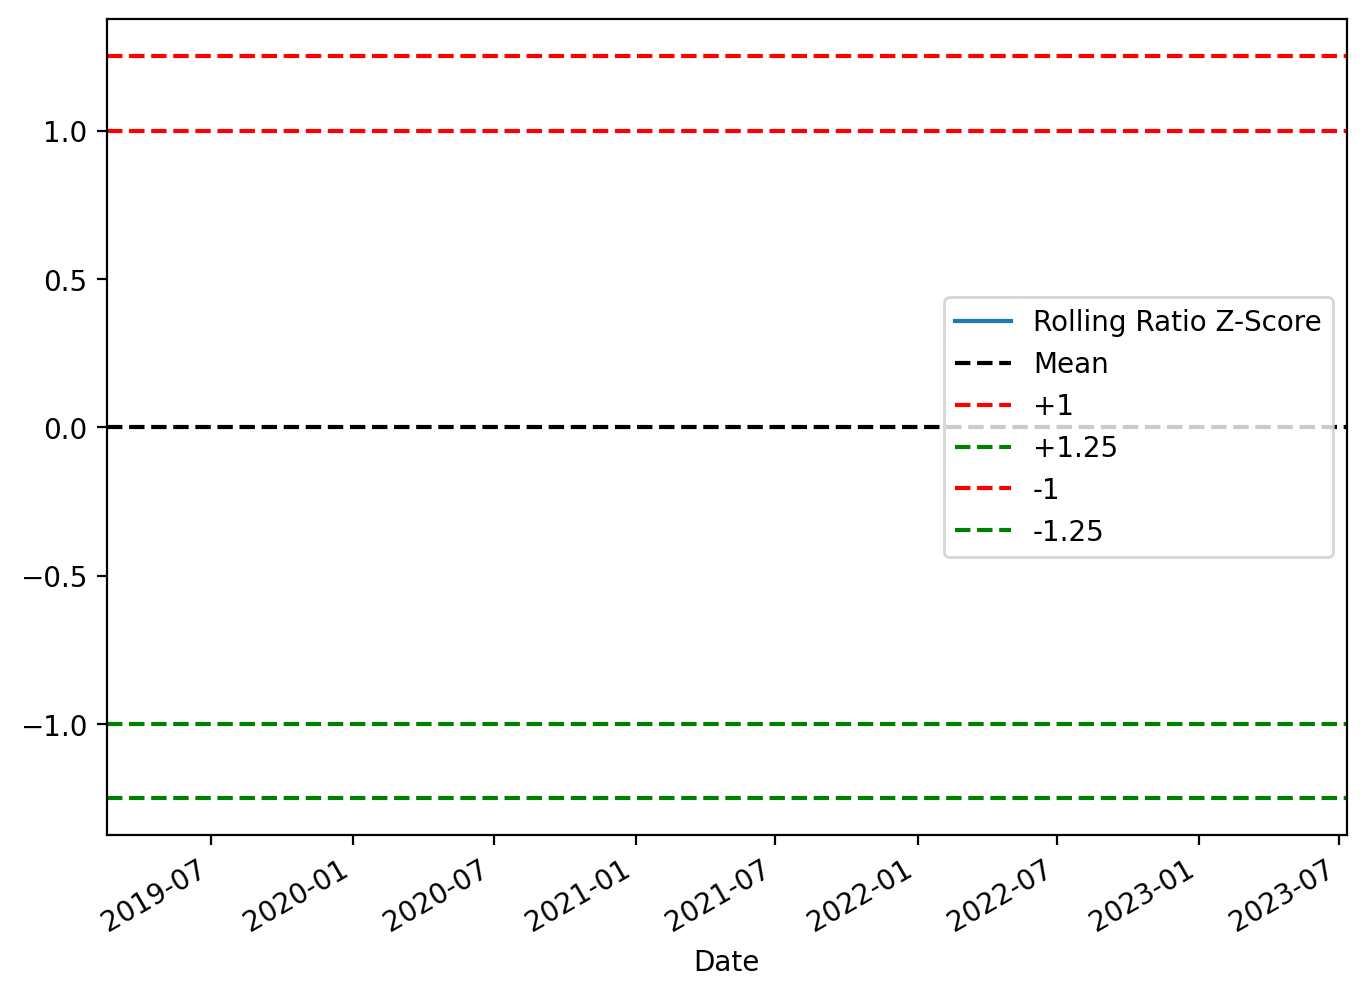

In [80]:
figure(figsize=(8,6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black', linestyle='--')
plt.axhline(1.0, color='red', linestyle='--') # Setting upper bound to the z-sscore of 1.0 (68% confidence interval)
plt.axhline(-1.0, color='green', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--') # Setting upper bound to the z-sscore of 1.5 (79% confidence interval)
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio Z-Score', 'Mean', '+1', '+1.25', '-1', '-1.25'])
plt.show()

ValueError: Unrecognized marker style '∧'

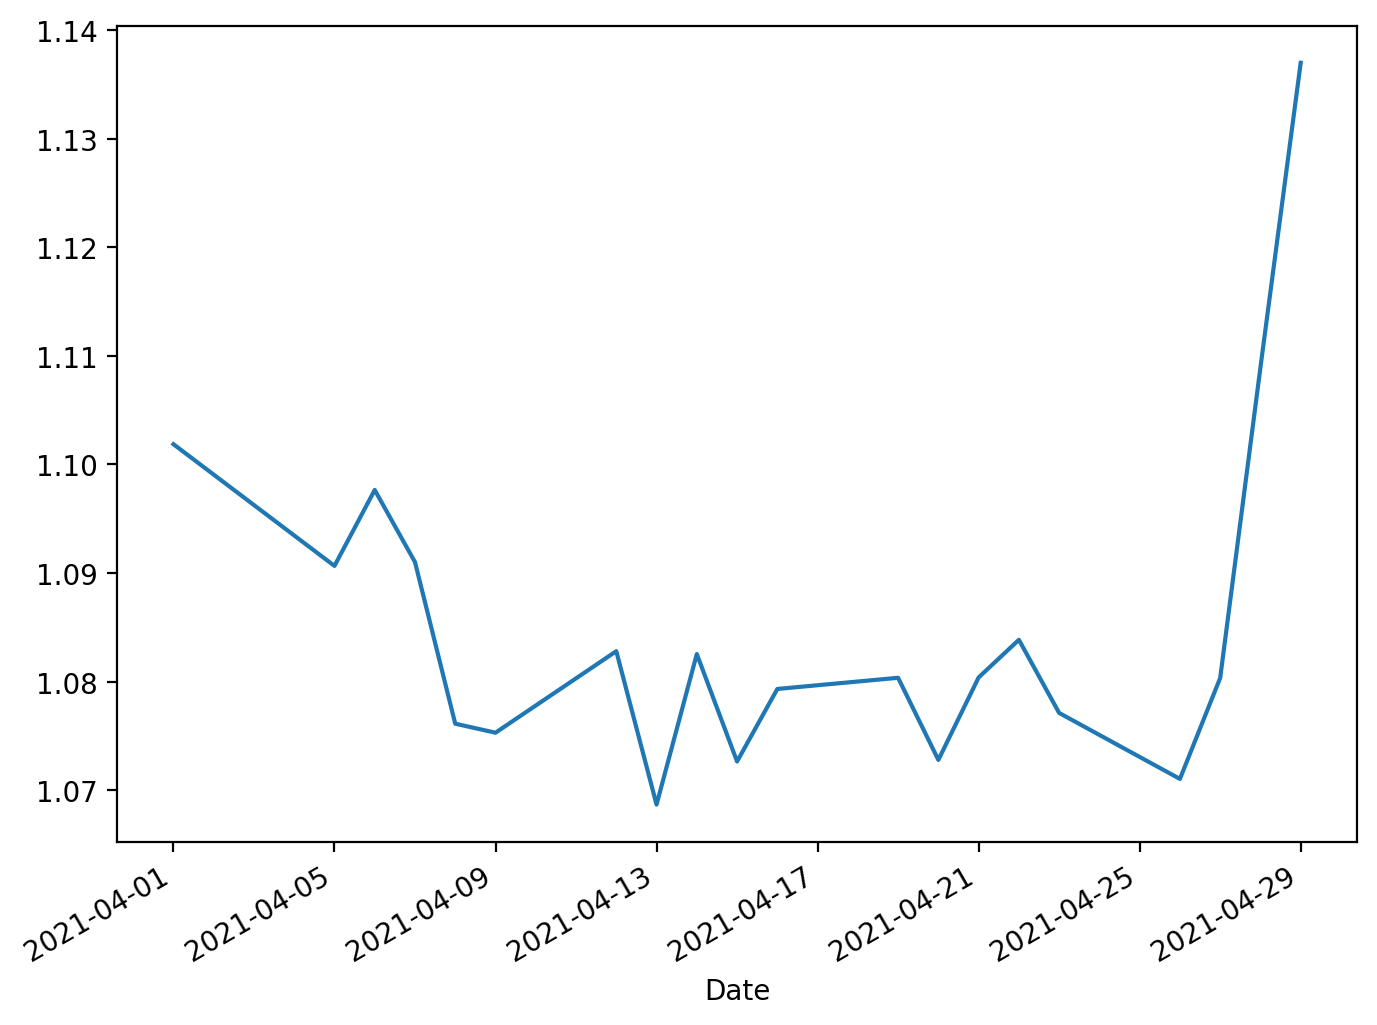

In [81]:
figure(figsize=(8,6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5 > 1.0] = None
buy[zscore_20_5 < 1.0] = None
buy.plot(marker='∧', linestyle='None', color='green')
sell.plot(marker='V', linestyle='None', color='red')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max*()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship between ...')
plt.show()